<a href="https://colab.research.google.com/github/Coder-Wasim/Learning/blob/main/TimeStamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# temp =  pd.read_csv('temp.csv',parse_dates= ['datetime'])
temp =  pd.read_csv('temp.csv',index_col='datetime',parse_dates= True)
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [ ]:
temp.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [ ]:
#checjking the most no fo temp
temp.describe()

,LA,NY
count,35062.000000,35064.000000
mean,17.486016,12.068269
std,6.640666,10.466832
min,-6.600000,-22.400000
25%,12.900000,3.900000
50%,17.200000,12.500000
75%,21.900000,20.600000
max,42.300000,37.100000


array([[<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>]],
      dtype=object)

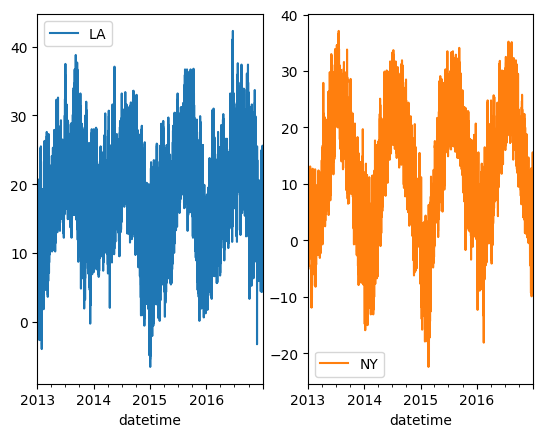

In [ ]:
from re import sub
temp.plot(subplots=True,layout=(1,2))

## Sliccing the Datetime index

In [ ]:
  temp.loc['2013-01-01 02:00:00']

,2013-01-01 02:00:00
LA,9.9
NY,-2.0


In [ ]:
temp.loc['2013-01-01'].head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [ ]:
temp.loc['20-May-2015'].head()

,LA,NY
datetime,,
2015-05-20 00:00:00,17.7,19.8
2015-05-20 01:00:00,18.0,19.7
2015-05-20 02:00:00,16.6,19.0
2015-05-20 03:00:00,14.4,19.0
2015-05-20 04:00:00,13.3,19.7


In [ ]:
temp.loc['20-May-2015 00:00:00':'20-May-2015 01:00:00']

,LA,NY
datetime,,
2015-05-20 00:00:00,17.7,19.8
2015-05-20 01:00:00,18.0,19.7


In [ ]:
temp.loc['20-May-2015':'20-May-2016'].head()

,LA,NY
datetime,,
2015-05-20 00:00:00,17.7,19.8
2015-05-20 01:00:00,18.0,19.7
2015-05-20 02:00:00,16.6,19.0
2015-05-20 03:00:00,14.4,19.0
2015-05-20 04:00:00,13.3,19.7


## Creatting date range by  using pd.date_range()

In [ ]:
pd.date_range(start='20-May-2015', end = '20-May-2016')#.shape

DatetimeIndex(['2015-05-20', '2015-05-21', '2015-05-22', '2015-05-23',
               '2015-05-24', '2015-05-25', '2015-05-26', '2015-05-27',
               '2015-05-28', '2015-05-29',
               ...
               '2016-05-11', '2016-05-12', '2016-05-13', '2016-05-14',
               '2016-05-15', '2016-05-16', '2016-05-17', '2016-05-18',
               '2016-05-19', '2016-05-20'],
              dtype='datetime64[ns]', length=367, freq='D')

#Downsampling

In [33]:
# pd.set_option('display.max_rows', None)
temp.loc['2013-01-01':'2013-01-31'].head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [22]:
temp_mnth = temp.resample(rule="ME").mean()
temp_mnth.head(2)

,LA,NY
datetime,,
2013-01-31,11.596237,1.129570
2013-02-28,12.587202,0.617857


In [23]:
  temp_mnth.index = temp_mnth.index.to_period('M')
  temp_mnth.head()

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328
2013-06,19.905417,22.225694
2013-07,22.093952,26.329704
2013-08,21.513172,22.480376
2013-09,22.404861,18.291806


<Axes: xlabel='datetime'>

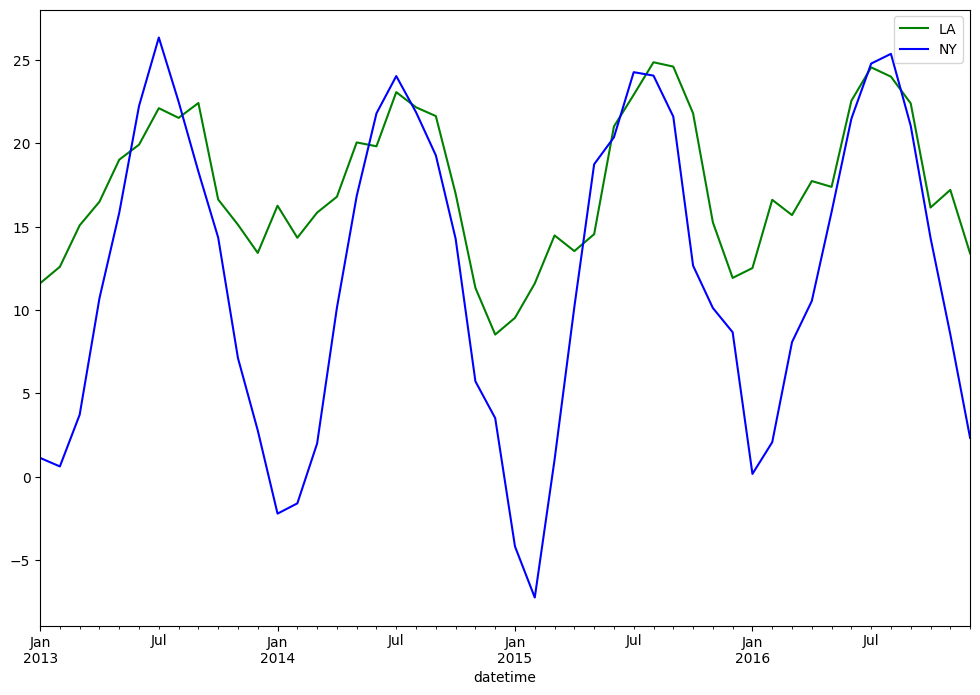

In [34]:
temp_mnth.plot(figsize=(12, 8), color=['green', 'blue'])